In [63]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [64]:
RI_data = pd.read_csv('Root_Insurance_data.csv')

In [77]:
column_list = list(RI_data.columns)
for i, col in enumerate(column_list):
    print("Item ${}: {}".format(i,col))

Item $0: Currently Insured
Item $1: Number of Vehicles
Item $2: Number of Drivers
Item $3: Marital Status
Item $4: bid
Item $5: rank
Item $6: click
Item $7: policies_sold
Item $8: Currently InsuredN
Item $9: Currently InsuredY
Item $10: Currently Insuredunknown
Item $11: Number of Vehicles2
Item $12: Number of Vehicles1
Item $13: Number of Vehicles3
Item $14: Number of Drivers1
Item $15: Number of Drivers2
Item $16: Marital StatusM
Item $17: Marital StatusS


In [66]:
cate_list = {}

for column in column_list:
    X = RI_data[column].value_counts()
    cate_list[column] = list((X.index))
    
print(cate_list)

{'Currently Insured': ['N', 'Y', 'unknown'], 'Number of Vehicles': [2, 1, 3], 'Number of Drivers': [1, 2], 'Marital Status': ['M', 'S'], 'bid': [10], 'rank': [3, 5, 4, 1, 2], 'click': [False, True], 'policies_sold': [0, 1]}


In [67]:
for column in column_list[:4]:
    for category in cate_list[column]:
        RI_data[str(column)+str(category)] = pd.get_dummies(RI_data[column])[category]

In [68]:
dums = list(RI_data.columns)[8:]
cratios = []
sratios = []
for i in range(3):
    for i1 in range(3,6):
        for i2 in range(6,8):
            for i3 in range(8,10):
               print(dums[i], dums[i1], dums[i2], dums[i3])
               data_temp = RI_data.loc[(RI_data[dums[i]]==1) & (RI_data[dums[i1]]==1)& (RI_data[dums[i2]]==1)& (RI_data[dums[i3]]==1), ['rank','click','policies_sold']]
               click = data_temp['click'].value_counts()
               print(click)
               sold = data_temp['policies_sold'].value_counts()
               print(sold)
               if len(click)==2:
                    click_ratio = click[1]/(click[1]+click[0])
               if len(sold)==2:
                    sold_ratio = sold[1]/click[1]
               cratios.append(click_ratio)
               sratios.append(sold_ratio)
       


Currently InsuredN Number of Vehicles2 Number of Drivers1 Marital StatusM
False    248
True      15
Name: click, dtype: int64
0    257
1      6
Name: policies_sold, dtype: int64
Currently InsuredN Number of Vehicles2 Number of Drivers1 Marital StatusS
False    256
True      16
Name: click, dtype: int64
0    267
1      5
Name: policies_sold, dtype: int64
Currently InsuredN Number of Vehicles2 Number of Drivers2 Marital StatusM
False    263
True      33
Name: click, dtype: int64
0    281
1     15
Name: policies_sold, dtype: int64
Currently InsuredN Number of Vehicles2 Number of Drivers2 Marital StatusS
False    284
True      32
Name: click, dtype: int64
0    301
1     15
Name: policies_sold, dtype: int64
Currently InsuredN Number of Vehicles1 Number of Drivers1 Marital StatusM
False    275
True      25
Name: click, dtype: int64
0    286
1     14
Name: policies_sold, dtype: int64
Currently InsuredN Number of Vehicles1 Number of Drivers1 Marital StatusS
False    228
True      43
Name: clic

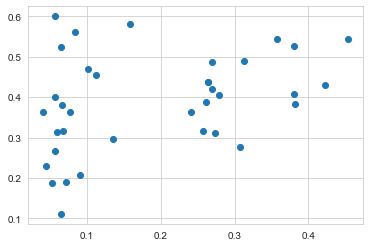

In [69]:
plt.scatter(cratios, sratios)

# end here

In [103]:
type_list = list(RI_data.columns)
type_list.pop(-1)
type_list.pop(-1)

'click'

In [70]:
a = RI_data['policies_sold'].value_counts()
a[1]/(a[0]+a[1])

0.0783

In [71]:
a = RI_data.loc[RI_data['click'] == True, 'policies_sold'].value_counts()
a[1]/(a[0]+a[1])

0.4169329073482428

In [72]:
result = []
for types in type_list:
    types_dic = {}
    X = RI_data[types].value_counts()
    Y = list(X.index)
    for index in Y:
        a = RI_data.loc[RI_data[types]==index, 'policies_sold' ].value_counts()
        b = a[1]/(a[0]+a[1])
        types_dic[index] = b
    result.append(types_dic)
print(result)

KeyError: 1

In [62]:
 result_click = []
for types in type_list:
    types_dic = {}
    X = RI_data[types].value_counts()
    Y = list(X.index)
    for index in Y:
        a = RI_data.loc[RI_data[types]==index, 'click' ].value_counts()
        b = a[1]/(a[0]+a[1])
        types_dic[index] = b
    result.append(types_dic)
print(result)

KeyError: 1